### A MCMC implementation for a standard normal distribution

#### **Target Distribution (Posterior)**

In notebook, the goal is to generate samples from the standard normal distribution (a normal distribution centered around 0 with standard deviation of 1):
$$
p(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)
$$

Since there is **no data** (I'm not conditioning on any observations for this simple example), the posterior is simply the **target distribution** $p(x)$, the standard normal density.

#### **Likelihood**

For the standard normal, when simulating from the distribution (not fitting to data), the **likelihood** term is just the value of the target density itself:
$$
L(x) = p(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)
$$

#### **MCMC steps**

1. **Proposal Step:**
   - Propose a new point $x^*$ from a normal distribution centered at the current $x$:
     $$
     x^* \sim \mathcal{N}(x^{(t-1)}, \sigma^2)
     $$
   - This is a **random walk Metropolis** proposal: $q(x^* | x^{(t-1)}) = \mathcal{N}(x^{(t-1)}, \sigma^2)$.

2. **Acceptance Ratio:**
   - Since the proposal distribution is symmetric, the $q$ terms cancel out in the general M-H acceptance ratio:
     $$
     \alpha = \min\left(1, \frac{p(x^*)}{p(x^{(t-1)})}\right)
     $$
   - Plugging in the normal density:
     $$
     \alpha = \min\left(1, \frac{\exp\left(-\frac{(x^*)^2}{2}\right)}{\exp\left(-\frac{(x^{(t-1)})^2}{2}\right)}\right)
     $$
     $$
     = \min\left(1, \exp\left(-\frac{1}{2}\left[(x^*)^2 - (x^{(t-1)})^2\right]\right)\right)
     $$

3. **Update Step:**
   - Accept $x^*$ with probability $\alpha$. Otherwise, keep the current value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
def MHSTDnormal(N, X0, sigmaSq):
    x = np.empty(N)
    x[0] = X0
    for i in range(1, N):
        xhat = np.random.normal(x[i-1], np.sqrt(sigmaSq))
        accept_prob = np.exp(-0.5 * (xhat**2 - x[i-1]**2))
        if np.random.uniform() <= accept_prob:
            x[i] = xhat
        else:
            x[i] = x[i-1]
    return x

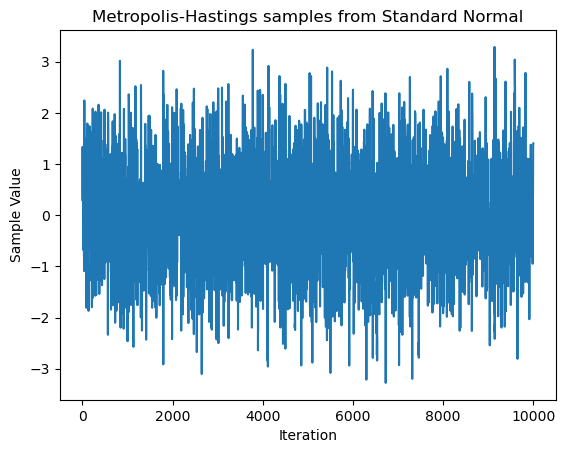

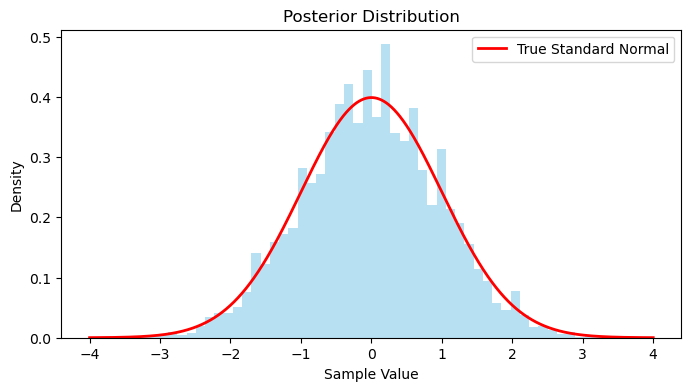

In [3]:
normalSamples = MHSTDnormal(N = 10000, # number of iterations
                            X0 = 0.3,  # starting value
                            sigmaSq = 10**1 # variance of the standard normal (sd = 1, var = 1^2)
                           )

plt.plot(normalSamples)
plt.title('Metropolis-Hastings samples from Standard Normal')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')
plt.show()

plt.figure(figsize = (8,4))
count, bins, ignored = plt.hist(normalSamples, bins = 50, density = True, alpha = 0.6, color = "skyblue")

x = np.linspace(-4, 4, 1000)
plt.plot(x, 1/np.sqrt(2*np.pi) * np.exp(-x**2/2), 'r', lw=2, label='True Standard Normal')

plt.title('Posterior Distribution')
plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.legend()
plt.show()